
 <h1><center> Analysis of U.S Presedential Inaugural Speeches </center></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Section_1"> Importing Required Libraries</a></li>
        <li><a href="#Section_2"> Importing and Preprocessing Data Frame</a></li>
        <li><a href="#Section_3"> Question 1</a></li>
        <li><a href="#Section_4"> Question 2</a></li>
        <li><a href="#Section_5"> Question 3</a></li>
        <li><a href="#Section_6"> Question 4</a></li>
    </ol>
</div>

<h2 id="#Section_1"> 1.Importing Required Libraries</h2>

In [20]:
# importing required libraries
import nltk
from nltk.corpus import inaugural
nltk.download('inaugural') #inaugural corpus
import pandas as pd
import regex as re
import os
import warnings
warnings.filterwarnings('ignore')
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\saisu\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


<h2 id="#Section_2"> 2. Importing_and_pre-processing_Data_Frame </h2>

In [2]:
#Predsident by Name and party from Github
Presidents_by_Year = pd.read_csv('Presidents_Parties.csv')

In [3]:
# Presedential Speeches 
speeches_df = pd.DataFrame() 
for speech in inaugural.fileids():
    speeches_df = speeches_df.append({'Year': speech[0:4],'Speech':inaugural.raw(speech)}, ignore_index=True)
speeches_df['Year']=speeches_df['Year'].astype(int)
#merge dataframes
speeches_df_Year_party=pd.concat([speeches_df,Presidents_by_Year],axis=1)

<h2 id="#Section_3"> 3. Vocab length of each president </h2> 

In [4]:
#Iterating over DF and adding a new col 'vocab_len for each record.'
speeches_df_Year_party['Vocab_len']=''
for i in speeches_df_Year_party.index:
    Speech_Corpus_by_President=speeches_df_Year_party['Speech'][i].strip().lower() #removing leading spaces and lowering text
    Speech_Words_by_President=Speech_Corpus_by_President.split() #split to words list
    Speech_Words_by_President = [re.sub(r'[:!?\.,-]+', '', h) for h in Speech_Words_by_President] # removing punctuations
    speeches_df_Year_party['Vocab_len'][i]=len(set([w.lower() for w in Speech_Words_by_President]))#adding len to df

### Question 1 
### Which president has the most vocabulary as evident from their inaugural speeches, and which presidents has the least vocabulary? On average, do Democratic, Republican, or Other presidents have higher vocabulary?

In [5]:
speeches_df_Year_party[speeches_df_Year_party['Vocab_len']==speeches_df_Year_party['Vocab_len'].max()] #max vocab len record

,Speech,Year,Party,President,Vocab_len
13,Called from a retirement which I had supposed ...,1841,Others,William Henry Harrison,1848


### Benjamin Harrison with 1848 words has highest Vocab 

In [6]:
speeches_df_Year_party[speeches_df_Year_party['Vocab_len']==speeches_df_Year_party['Vocab_len'].min()]# min vocab len record

,Speech,Year,Party,President,Vocab_len
1,"Fellow citizens, I am again called upon by the...",1793,Others,George Washington,90


### George Washington with  90 words has lowest Vocab 

In [7]:
speeches_df_Year_party['Vocab_len']=speeches_df_Year_party['Vocab_len'].astype(int) #to int
#renaming party names into republic,democrat and others 
speeches_df_Year_party['Party'].replace({'Republican/NationalUnion':'Republican','Democratic-Republican':'Other','Federalist':'Other',
                                        'Whig':'Other','Democratic-Republican':'Other','Independent':'Other',
                                        'Democratic-Republican/NationalRepublican':'Other'},inplace=True)

Party
Democratic    714.772727
Others        792.200000
Republican    822.666667
Name: Vocab_len, dtype: float64


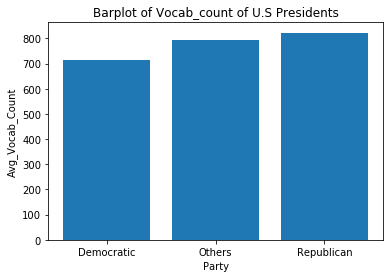

In [8]:
#function to retun avg vocab count and graph by party
def Avg_vocab_count_by_party():
    print(speeches_df_Year_party.groupby('Party')['Vocab_len'].mean())
    Vocab_len_by_party=speeches_df_Year_party.groupby('Party')['Vocab_len'].mean().reset_index()
    plt.bar(Vocab_len_by_party['Party'], Vocab_len_by_party['Vocab_len'])
    plt.xlabel('Party')
    plt.xticks(rotation=0)
    plt.ylabel('Avg_Vocab_Count')
    plt.title('Barplot of Vocab_count of U.S Presidents')
Avg_vocab_count_by_party()

#### On average Republican Presidents has the highest Vocabulary Followed by Others and then Democrats. Their respective Vocab Word counts are 822,792,714 words respectively

### Question-2
### Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Trump) in this sample of presidential speeches. Color code this barplot as blue for Democrats, red for Republican, and gray for Others.


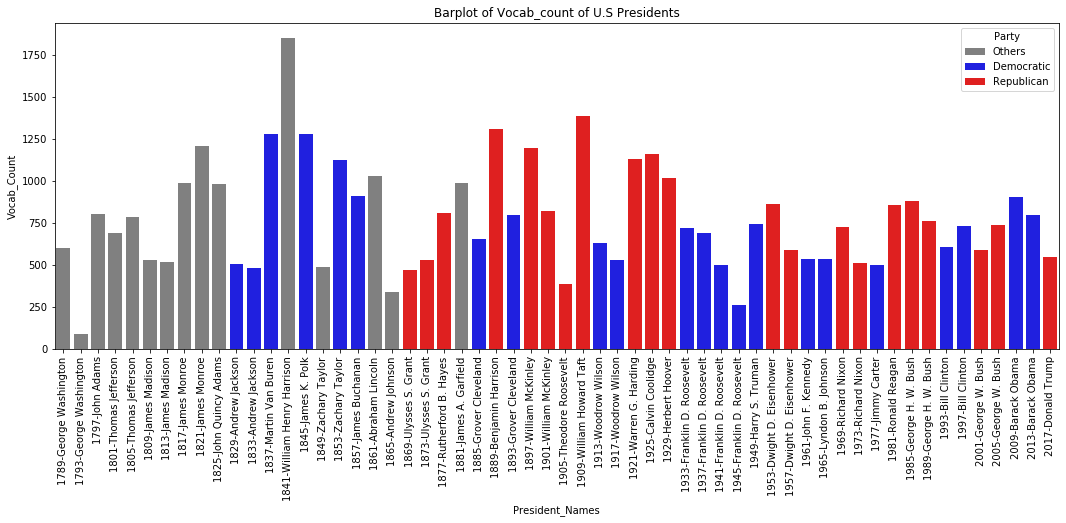

In [9]:
#function to plot all vocab count of president group by color
def Presidents_vocab_by_party():    
    speeches_df_Year_party['President_Year']=speeches_df_Year_party['Year'].astype(str)+'-'+speeches_df_Year_party['President']
    palette={"Democratic": "Blue", "Republican": "Red", "Others": "Grey"}
    plt.figure(figsize=(18,6))
    sns.barplot(x=speeches_df_Year_party['President_Year'], y=speeches_df_Year_party['Vocab_len'],hue=speeches_df_Year_party['Party'],palette=palette,dodge=False) # color=clrs)
    plt.xlabel('President_Names')
    plt.xticks(rotation=90)
    plt.ylabel('Vocab_Count')
    plt.title('Barplot of Vocab_count of U.S Presidents')
Presidents_vocab_by_party()

#### From the above Graph we can see that Presidents in the early 18th,19th Century has highest Vocabulary compared to 20th Centuries. With highest Vocab being William Henry Harrison and lowest  George Washington. 

#### Republican vocab has been decling on an average from 1909, whereas democrats voacabs are wavering around a average.  

#### Initial presidencies were mostly independent 1829 was the first democratic president and republic president was in 1869.  We can see from 1885 U.S become Bi-party government 

### Top Words used by Presidents

### Question 3

###  What are the five most frequently used words (exclusive of stop words) used by each president? Do Democratic presidents use a different set of words than Republican presidents? 

In [10]:
#Function to return top 5 words by president
stop_words = nltk.corpus.stopwords.words('english')
def Top_5_words(speech):
    #Speech_Corpus_by_President=speeches_df_Year_party['Speech'][i].strip().lower()
    Speech_Corpus_by_President=speech.strip().lower()
    Speech_Words_by_President=Speech_Corpus_by_President.split()
    Speech_Words_by_President = [re.sub(r'[:!?\.,-]+', '', h) for h in Speech_Words_by_President]
    Speech_Words_by_President = [w for w in Speech_Words_by_President if w not in stop_words]
    Speech_Words_by_President = [w for w in Speech_Words_by_President if len(w)>1]
    Speech_Words_by_President_freq=FreqDist(Speech_Words_by_President)
    Speech_Words_by_President_freq_List=[]
    for key, value in Speech_Words_by_President_freq.items():
        if value !='':
            Speech_Words_by_President_freq_List.append((value, key))
    Speech_Words_by_President_freq_List.sort(reverse=True)
    top_5_Words = Speech_Words_by_President_freq_List[0:5]
    values, Words = zip(*top_5_Words)
    return Words

In [11]:
#Adding to dataframe for printing words and president
speeches_df_Year_party['Top_5_Words']=''
for i in speeches_df_Year_party.index:
    speeches_df_Year_party['Top_5_Words'][i]=Top_5_words(speeches_df_Year_party['Speech'][i])

#### Below are the words by top 5 words used by US presidents 

In [12]:
speeches_df_Year_party[['President','Top_5_Words']]

,President,Top_5_Words
0,George Washington,"(every, government, public, may, present)"
1,George Washington,"(shall, oath, witnesses, willingly, voice)"
2,John Adams,"(people, government, may, nations, states)"
3,Thomas Jefferson,"(government, us, may, let, would)"
4,Thomas Jefferson,"(public, may, citizens, state, fellow)"
5,James Madison,"(public, nations, well, states, rights)"
6,James Madison,"(war, united, every, country, british)"
7,James Monroe,"(great, government, states, us, people)"
8,James Monroe,"(great, states, would, war, united)"
9,John Quincy Adams,"(union, upon, government, rights, public)"


#### Comparision of Democrats and Republicans most frequent words

In [13]:
## creating corpus by party and creating dict of corpus
Speech_Corpus_Democratic=''
Speech_Corpus_Republican=''
Speech_Corpus_Other=''
for i in speeches_df_Year_party.index:
    if 'Democratic' in speeches_df_Year_party['Party'][i]:
        Speech_Corpus_Democratic=Speech_Corpus_Democratic + speeches_df_Year_party['Speech'][i].strip().lower()
    if 'Republican' in speeches_df_Year_party['Party'][i]:
        Speech_Corpus_Republican=Speech_Corpus_Republican + speeches_df_Year_party['Speech'][i].strip().lower()
    else:
        Speech_Corpus_Other=Speech_Corpus_Other + speeches_df_Year_party['Speech'][i].strip().lower()
speeches_df_party_dict = pd.DataFrame({'Party': ['Democratic', 'Republican', 'Other'],
                   'Speech': [Speech_Corpus_Democratic, Speech_Corpus_Republican, Speech_Corpus_Other]})
speeches_df_party_dict

,Party,Speech
0,Democratic,"fellow citizens, about to undertake the arduou..."
1,Republican,citizens of the united states:\n\nyour suffrag...
2,Other,fellow-citizens of the senate and of the house...


In [14]:
## top_5 words by speech by calling top_5 words which we created for presedent words
speeches_df_party_dict['Vocab_Count']=''
speeches_df_party_dict['top_5_Words']=''
for i in speeches_df_party_dict.index:
    speeches_df_party_dict['top_5_Words'][i]=Top_5_words(speeches_df_party_dict['Speech'][i])
speeches_df_party_dict[['Party','top_5_Words']]

,Party,top_5_Words
0,Democratic,"(people, us, government, must, shall)"
1,Republican,"(people, us, government, must, world)"
2,Other,"(government, people, us, may, states)"


####  Democrats and Republicans use same set of words for their speech based on frequent used words.

### Question 4

### 4. Compute a sentiment (positive/negative) for each president, and draw three barplots of Democratic, Republican, and other presidents in chronological order. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group?


In [15]:
## Polarity calculation from Textblob NaiveBayesAnalyser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
speeches_df_Year_party['Compound']=''
speeches_df_Year_party['pos']=''
for i in speeches_df_Year_party.index:
    speeches_df_Year_party['Compound'][i] = analyzer.polarity_scores(speeches_df_Year_party['Speech'][i].strip().lower())['compound']
    speeches_df_Year_party['pos'][i] = analyzer.polarity_scores(speeches_df_Year_party['Speech'][i].strip().lower())['pos']

In [16]:
#defination to Sentiment barplot by party and color
def sentiment_barplot(Party,Color):
    plt.figure(figsize=(8,5))
    x=speeches_df_Year_party[speeches_df_Year_party.Party==Party]['President_Year']# X axis
    y=speeches_df_Year_party[speeches_df_Year_party.Party==Party]['Compound']# y-axis
    sns.barplot(x=x, y=y,color=Color) #plot
    plt.xlabel('President_Names')
    plt.xticks(rotation=90)
    plt.ylabel('Compound Sentiment')
    plt.title('Barplot of Compound sentiment of '+ Party + ' U.S Presidents')

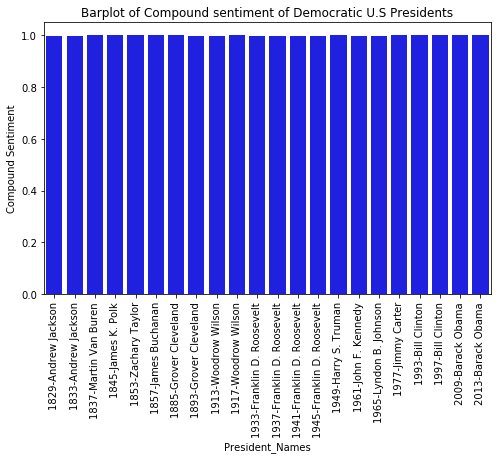

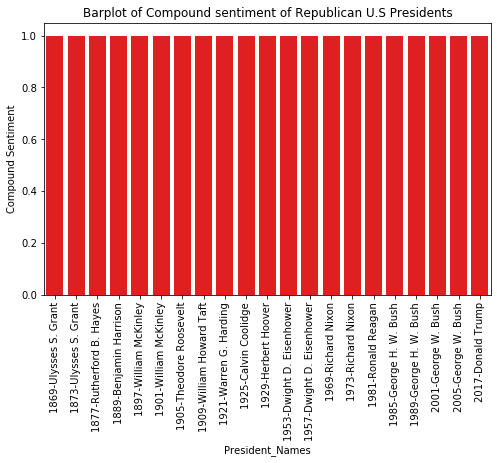

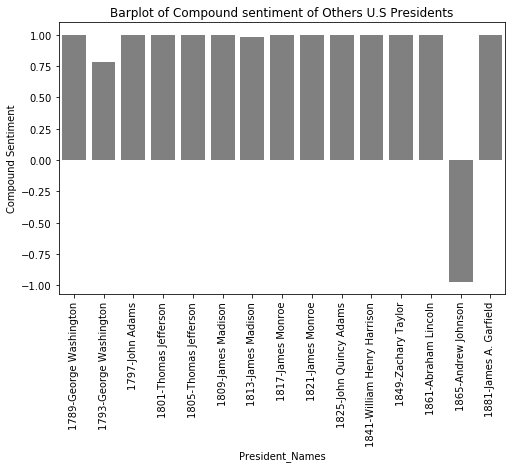

In [17]:
##calling functons
sentiment_barplot('Democratic','Blue')
sentiment_barplot('Republican','Red')
sentiment_barplot('Others','Grey')

#### From the above Bar_plots we can see that all presedential speeches of Republican and democratic presedents are compounded to aproximately 1. This might be due to the high positive words used after winning elections.

#### One intresting thing to observe from the graph is the speech of Andrew Johnson in 1865. The polarity of the speech is negative. Also, George washington speech of 1793 which is at approx~ 075 when compared to all other speeches at ~1.

In [18]:
#compound sentiment score group by party
speeches_df_Year_party['Compound']=speeches_df_Year_party['Compound'].astype(float)
print(speeches_df_Year_party.groupby('Party')['Compound'].mean())

Party
Democratic    0.999627
Others        0.852627
Republican    0.999886
Name: Compound, dtype: float64


####  Republicans has higher mean sentiment score.

In [19]:
#top 3 presidents by positive sentiment score and party 
speeches_df_Year_party=speeches_df_Year_party.sort_values(['pos'], ascending=False)
speeches_df_Year_party.groupby('Party')['Party','President','pos'].head(3).sort_values(['Party'])

,Party,President,pos
47,Democratic,Jimmy Carter,0.284
40,Democratic,Harry S. Truman,0.274
17,Democratic,James Buchanan,0.225
2,Others,John Adams,0.259
0,Others,George Washington,0.239
15,Others,Zachary Taylor,0.237
42,Republican,Dwight D. Eisenhower,0.272
54,Republican,George W. Bush,0.271
41,Republican,Dwight D. Eisenhower,0.262


#### Above are the top 3 presidents by positive sentiment score in each group of parties 